We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### Loading and normalizing 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=False, num_workers=2)

0it [00:00, ?it/s]

100%|█████████▉| 170369024/170498071 [00:53<00:00, 3213728.69it/s]

Files already downloaded and verified


In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

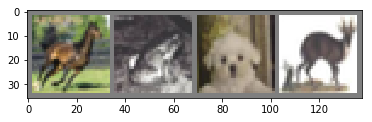

In [12]:
imshow(torchvision.utils.make_grid(images))

In [16]:
print(' '.join('%s' % classes[labels[j]] for j in range(4)))

horse frog dog deer


### Define cnn

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

### Define loss function and optimizer

In [20]:
import torch.optim as optim

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### Train the network

In [70]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs, labels = data    
        net.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2000 == 1999:
            print('epochs: %d, steps: %d, loss: %.3f' %
                 (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Complete Training')

epochs: 1, steps: 2000, loss: 1.458
epochs: 1, steps: 4000, loss: 1.440
epochs: 1, steps: 6000, loss: 1.400
epochs: 1, steps: 8000, loss: 1.403
epochs: 1, steps: 10000, loss: 1.399
epochs: 1, steps: 12000, loss: 1.401
epochs: 2, steps: 2000, loss: 1.303
epochs: 2, steps: 4000, loss: 1.320
epochs: 2, steps: 6000, loss: 1.313
epochs: 2, steps: 8000, loss: 1.306
epochs: 2, steps: 10000, loss: 1.321
epochs: 2, steps: 12000, loss: 1.324
Complete Training


### Test

In [71]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %.3f ' % (correct / total))

Accuracy of the network on the 10000 test images: 0.520 


In [72]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 74 %
Accuracy of  bird : 29 %
Accuracy of   cat : 31 %
Accuracy of  deer : 39 %
Accuracy of   dog : 38 %
Accuracy of  frog : 66 %
Accuracy of horse : 57 %
Accuracy of  ship : 73 %
Accuracy of truck : 52 %
